### import packages

In [128]:
import os
import re
import pandas as pd

### set working directory

In [129]:
# change working directory to the /Users/tildeidunsloth/Desktop/DatSci_25/DatSci_25/cleaned
os.chdir('/Users/tildeidunsloth/Desktop/DatSci_25/DatSci25/data/cleaned/')

### load data

In [130]:
# load in csv file with pandas
df = pd.read_csv('parliament_speeches.csv')

### inspect data

In [131]:
# show ten first rows
print(df.head(10))

# check length of dataframe
print(len(df))

# check how many rows for each unique year
print(df['year'].value_counts())

# show rows with year 2000
print(df[df['year'] == 2000])

   year  meeting_number                speaker  \
0  2013              45         Valgs Prøvelse   
1  2013              45         Valgs Prøvelse   
2  2013              45              Formanden   
3  2013              45              Formanden   
4  2013              45         Valgs Prøvelse   
5  2013              45  Forhandling Formanden   
6  2013              45   Afstemning Formanden   
7  2013              45         Valgs Prøvelse   
8  2013              45  Forhandling Formanden   
9  2013              45   Afstemning Formanden   

                                              speech  
0  Godkendelse af stedfortræder som midlertidigt ...  
1  Godkendelse af stedfortræder som repræsentant ...  
2  Mødet er åbnet. I dag er der følgende anmeldel...  
3  Anne Baastrup (SF) har søgt om orlov på grund ...  
4  Godkendelse af stedfortræder som midlertidigt ...  
5  Fra Udvalget til Valgs Prøvelse har jeg modtag...  
6  Jeg slutter afstemningen. Udvalgets indstillin...  
7  Godken

### remove klimaminister from speech

In [132]:
# remove klima- minister from the dataframe
pattern = r'\bklima(?:[-,][^,\n\r]*?)*? *og *[^,\n\r]*?minister(?:en)?\b'
df['speech'] = df['speech'].str.replace(pattern, '', flags=re.IGNORECASE, regex=True)


### create klima subset

In [133]:
# make a subset of rows where the word "klima" appears in the speech
klima_df = df[df['speech'].str.contains('klima', case=False, na=False)]

In [134]:
print(len(klima_df))
print(klima_df.head(10))

16897
      year  meeting_number                                            speaker  \
229   2013              45                                Christian Juhl (EL)   
454   2013              51                       Lars Christian Lilleholt (V)   
456   2013              51                                          Theil (S)   
460   2013              51                             Andreas Steenberg (RV)   
462   2013              51                                    Steen Gade (SF)   
464   2013              51                                   Per Clausen (EL)   
468   2013              51  Klima Energi Og Bygningsministeren (Rasmus Hel...   
469   2013              51                                     (Bent Bøgsted)   
895   2013              86                          Christian Friis Bach (RV)   
1837  2013              92                  Miljøministeren (Kirsten Brosbøl)   

                                                 speech  
229   Jeg tror ikke, at de fleste arbejdere 

### add party column

In [135]:
# extract parties

# list of valid party abbreviations
valid_parties = {
    "S", "V", "DD", "SF", "LA", "M", "KF", "EL", "DF", "RV", "ALT", 
    "BP", "N", "IA", "SP", "JF", "CD", "NB", "KRF", "FP", "SIU", "KD"
}

# Function to extract and validate party abbreviation
def extract_party(speaker):
    match = re.search(r'\(([^()]+)\)', speaker)
    if match:
        party = match.group(1).strip()
        if party in valid_parties:
            return party
    return None

# Apply to dataframe
klima_df['party'] = klima_df['speaker'].apply(extract_party)



<ipython-input-135-bc7017e8c90c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klima_df['party'] = klima_df['speaker'].apply(extract_party)


In [136]:
# print unique speakers where party is Na and the amount of times they appear
print(klima_df[klima_df['party'].isna()]['speaker'].value_counts().head(50))


Statsministeren (Mette Frederiksen)                                198
Energi Forsynings Og Klimaministeren (Lars Christian Lilleholt)    177
Klima Energi Og Forsyningsministeren (Dan Jørgensen)               155
Statsministeren (Lars Løkke Rasmussen)                             112
Klima Og Energiministeren (Lykke Friis)                            111
Klima Energi Og Forsyningsministeren (Lars Aagaard)                110
Theresa Scavenius (UFG)                                             85
Formanden (Pia Kjærsgaard)                                          83
Miljøministeren (Lea Wermelin)                                      77
Klima Og Energiministeren (Connie Hedegaard)                        74
Afstemning Formanden (Pia Kjærsgaard)                               63
Finansministeren (Nicolai Wammen)                                   61
(Rasmus Prehn)                                                      60
Susanne Zimmer (FG)                                                 55
(Chris

In [137]:
# Fix when party is NA

# Append 'DF' if speaker is exactly '(Pia Kjærsgaard)'
klima_df.loc[klima_df['speaker'] == "(Pia Kjærsgaard)", 'party'] = (
    klima_df.loc[klima_df['speaker'] == "(Pia Kjærsgaard)", 'party'].fillna("") + "DF"
)
# name-to-party mapping
name_to_party = {
    "Mette Frederiksen": "S",
    "Lars Christian Lilleholt": "V",
    "Dan Jørgensen": "S",
    "Lykke Friis": "V",
    "Lars Aagaard": "M",
    "Theresa Scavenius": "ALT",
    "Lea Wermelin": "S",
    "Connie Hedegaard": "KF",
    "Nicolai Wammen": "S",
    "Rasmus Prehn": "S",
    "Susanne Zimmer": "ALT",
    "Christian Juhl": "EL",
    "Benny Engelbrecht": "S",
    "Anders Fogh Rasmussen": "V",
    "Jeppe Kofod": "S",
    "Sikandar Siddique": "ALT",
    "Henrik Dam Kristensen": "S",
    "Jeppe Bruus": "S",
    "Leif Mikkelsen": "LA",
    "Mette Bock": "LA",
    "Ida Auken": "S",
    "Kristian Pihl Lorentzen": "V",
    "Morten Bødskov": "S",
    "Magnus Heunicke": "S",
    "Karsten Lauritzen": "V",
    "Jacob Jensen": "V",
    "Kristian Jensen": "V",
    "Martin Lidegaard": "RV",
    "Rasmus Helveg Petersen": "RV",
    "Bendt Bendtsen": "KF",
    "Helle ThorningSchmidt": "S",
    "Helle Thorning Schmidt": "S",
    "Simon Kollerup": "S",
    "Søren Gade": "V",
    "Bent Bøgsted": "DD",
    "Per Stig Møller": "KF",
    "Claus Hjort Frederiksen": "V",
    "Susanne Zimmer": "ALT",
    "Ulla Tørnæs": "V",
    "Søren Espersen": "DD",
    "Erling Bonnesen": "V",
    "Hans Christian Schmidt": "V",
    "Lene Espersen": "KF",
    "Karina Adsbøl": "DD",
    "Thomas Danielsen": "V",
    "Trine Torp": "SF",
    "Kirsten Brosbøl": "S",
    "Lars Barfoed": "KF",
    "Karsten Hønge": "SF",
    "Esben Lunde Larsen": "V",
    "Svend Auken": "S",
    "Jeppe Søe": "M",
    "Karen Ellemann": "V",
    "Jakob EllemannJensen": "V",
    "Jakob Ellemann Jensen": "V",
    "Helge Adam Møller": "KF",
    "Mogens Jensen": "S",
    "Bjarne Laustsen": "S",
    "Ole Birk Olesen": "LA",
    "Leif Lahn Jensen": "S",
    "Anders Samuelsen": "LA",
    "Flemming Hansen": "KF",
    "Brian Mikkelsen": "KF",
    "Peter Hummelgaard": "S",
    "Troels Lund Poulsen": "V",
    "Mogens Lykketoft": "S",
    "Stine Brix": "EL",
    "Ole Sohn": "S",
    "Morten Dahlin": "V",
    "Uffe Elbæk": "ALT",
    "Eva Kjer Hansen": "V",
    "Louise Schack Elholm": "V",
    "Annette Lind": "S",
    "Thor Pedersen": "V",
    "Henrik Høegh": "V",
    "Carina Christensen": "KF",
    "Rasmus Jarlov": "KF",
    "Søren Pind": "V",
    "Bjarne Corydon": "S",
    "Rasmus Stoklund": "S",
    "Poul Nyrup Rasmussen": "S",
    "Pernille RosenkrantzTheil": "S",
    "Pernille Rosenkrantz Theil": "S",
    "Ellen Trane Nørby": "V",
    "Camilla Hersom": "RV",
    "Henrik Sass Larsen": "S",
    "Mattias Tesfaye": "S",
    "Birgitte Vind": "S",
    "Stephanie Lose": "V",
    "Kaare Dybvad": "S",
    "Bertel Haarder": "V",
    "Jakob Axel Nielsen": "KF",
    "Flemming Møller Mortensen": "S",
    "Trine Bramsen": "S",
    "Ane HalsboeJørgensen": "S",
    "Ane Halsboe Jørgensen": "S",
    "Villy Søvndal": "SF",
    "Anne Grete Holmsgaard": "SF",
    "Carsten Hansen": "S",
    "Jon Stephensen": "M",
    "Torsten Schack Pedersen": "V",
    "Helge Sander": "V",
    "Morten Østergaard": "RV",
    "Per Clausen": "EL",
    "Merete Riisager": "LA",
    "Manu Sareen": "RV",
    "Christian Brask": "LA",
    "Joy Mogensen": "S",
    "Holger K. Nielsen": "SF",
    "Christine Antorini": "S",
    "Inger Støjberg": "DD",
    "Annette Vilhelmsen": "SF",
    "Nick Hækkerup": "S",
    "Niels Helveg Petersen": "RV",
    "Ole Løvig Simonsen": "S",
    "Mike Villa Fonseca": "M",
    "Christian Friis Bach": "V",
    "Jens Vibjerg": "V",
    "Lone Loklindt": "RV",
    "Hans Kristian Skibby": "DD"
}

def assign_party(row):
    if pd.notna(row['party']):
        return row['party']
    
    speaker = str(row['speaker'])
    year = row['year']

    # Special rule for Lars Løkke Rasmussen depending on year
    if "Lars Løkke Rasmussen" in speaker:
        return "V" if year <= 2022 else "M"
    
    # General rule: if any name in mapping is in the speaker string
    for name, party in name_to_party.items():
        if name in speaker:
            return party

    return pd.NA  # If no match found

klima_df['party'] = klima_df.apply(assign_party, axis=1)

/Users/tildeidunsloth/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
<ipython-input-137-ac15ad01fbb4>:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klima_df['party'] = klima_df.apply(assign_party, axis=1)


In [138]:
# print unique speakers where party is Na and the amount of times they appear
print(klima_df[klima_df['party'].isna()]['speaker'].value_counts().head(50))

Formanden (Pia Kjærsgaard)                83
Afstemning Formanden (Pia Kjærsgaard)     63
Formanden                                 52
Medspørger                                47
Eventuelt                                 31
Valgs Prøvelse                            23
Danmark                                   20
Lars Boje Mathiesen (UFG)                 18
Forhandling Formanden (Pia Kjærsgaard)    17
Næstformand                               17
Høgni Hoydal (TF)                         15
Klint)                                    14
Igen                                      12
Venstre                                   11
Afstemning Formanden                      10
Nielsen)                                   9
Altså                                      7
(Formanden                                 7
Magni Arge (T)                             7
Folketinget                                6
Det Konservative Folkeparti                5
Enhedslisten                               5
Moderatern

In [139]:
# remove rows where party is Na
klima_df = klima_df[~klima_df['party'].isna()]

In [140]:
# count rows
print(len(klima_df))

16108


### creating klima count plot

In [141]:
# Count all mentions of "klima" (including as part of compound words)
klima_all_mentions_per_year = klima_df['speech'].str.count(r'\bklima\w*', flags=re.IGNORECASE).groupby(klima_df['year']).sum()
print(klima_all_mentions_per_year)


year
2000     206
2001     186
2002     299
2003     205
2004     150
2005      93
2006     571
2007    1276
2008    1420
2009    2634
2010     710
2011     435
2012     396
2013     862
2014     533
2015    1572
2016    1356
2017    1175
2018    2679
2019    3457
2020    3016
2021    2988
2022    3373
2023    2827
2024    2202
Name: speech, dtype: int64


In [142]:
# Count exact mentions of "klima" or "klimaet" (not part of longer words)
klimaet_count_per_year_exact = klima_df['speech'].str.count(r'\bklima(et)?\b', flags=re.IGNORECASE).groupby(klima_df['year']).sum()
print(klimaet_count_per_year_exact)

year
2000     64
2001     24
2002     41
2003     29
2004     43
2005     34
2006     80
2007    300
2008    385
2009    483
2010    169
2011    154
2012    110
2013    230
2014    151
2015    327
2016    269
2017    225
2018    433
2019    635
2020    632
2021    556
2022    736
2023    599
2024    407
Name: speech, dtype: int64


In [143]:
# Count compound words that start with "klima" but are not just "klima" or "klimaet"
compound_klima_count_per_year = klima_df['speech'].str.count(r'\bklima(?!et\b)[a-zæøå]+', flags=re.IGNORECASE).groupby(klima_df['year']).sum()
print(compound_klima_count_per_year)

year
2000     142
2001     162
2002     258
2003     176
2004     107
2005      59
2006     491
2007     976
2008    1034
2009    2151
2010     541
2011     281
2012     286
2013     632
2014     382
2015    1245
2016    1087
2017     949
2018    2246
2019    2822
2020    2384
2021    2432
2022    2637
2023    2227
2024    1795
Name: speech, dtype: int64


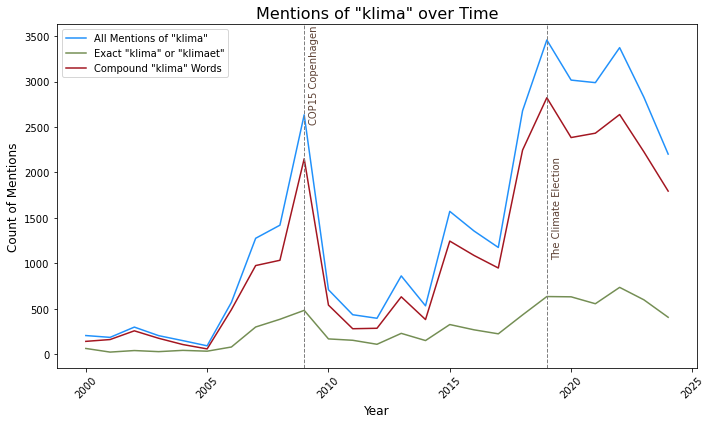

In [144]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each series
plt.plot(klima_all_mentions_per_year.index, klima_all_mentions_per_year.values, label='All Mentions of "klima"', color='#2191FB')
plt.plot(klimaet_count_per_year_exact.index, klimaet_count_per_year_exact.values, label='Exact "klima" or "klimaet"', color='#748E54')
plt.plot(compound_klima_count_per_year.index, compound_klima_count_per_year.values, label='Compound "klima" Words', color='#A31621')

# Add vertical lines and annotations
plt.axvline(x=2009, color='gray', linestyle='--', linewidth=1)
plt.text(2009 + 0.2, plt.ylim()[1], 'COP15 Copenhagen', rotation=90, verticalalignment='top', color='#5C4033')

plt.axvline(x=2019, color='gray', linestyle='--', linewidth=1)
plt.text(2019 + 0.2, plt.ylim()[1]*0.6, 'The Climate Election', rotation=90, verticalalignment='top', color='#5C4033')


# Customize the plot
plt.title('Mentions of "klima" over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Mentions', fontsize=12)
plt.legend()
plt.grid(False)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### save klima_df as csv

In [146]:
klima_df = klima_df[["year", "meeting_number", "speaker", "party", "speech"]]

In [147]:
# save klima_df to a new csv file
klima_df.to_csv('klima_speeches.csv', index=False)